<a href="https://colab.research.google.com/github/itsamirkhon/gdgkhujand-gemma/blob/main/Crop_yield_prediction_model_iypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Для начала работы импортируем необходимые библиотеки:
- `numpy` для работы с массивами и математических операций.
- `pandas` для работы с табличными данными.
- `matplotlib.pyplot` для создания графиков.
- `seaborn` для более продвинутой визуализации данных.

In [ ]:
pesticides_data = pd.read_csv('pesticides.csv')
rainfall_data = pd.read_csv('rainfall.csv')
temp_data = pd.read_csv('temp.csv')
yield_data = pd.read_csv('yield.csv')

Загружаем данные из CSV файлов:
- `pesticides.csv`: Данные об использовании пестицидов.
- `rainfall.csv`: Данные об осадках.
- `temp.csv`: Данные о температуре.
- `yield.csv`: Данные об урожайности.

<h1>Подготовка данных</h1>

**Pesticides data**

In [ ]:
pesticides_data.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201


In [ ]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [ ]:
pesticides_data.describe()

,Year,Value
count,4789.000000,4.789000e+03
mean,2004.142619,2.894718e+04
std,8.302595,1.627207e+05
min,1990.000000,0.000000e+00
25%,1997.000000,9.900000e+01
50%,2004.000000,1.221000e+03
75%,2011.000000,7.420000e+03
max,2018.000000,1.815690e+06


In [ ]:
len(pesticides_data['Area'].unique())

172

In [ ]:
len(pesticides_data['Year'].unique())

29

In [ ]:
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121
1,Albania,Pesticides (total),1991,tonnes,121
2,Albania,Pesticides (total),1992,tonnes,121
3,Albania,Pesticides (total),1993,tonnes,121
4,Albania,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
4784,Zimbabwe,Pesticides (total),2014,tonnes,2185
4785,Zimbabwe,Pesticides (total),2015,tonnes,2185
4786,Zimbabwe,Pesticides (total),2016,tonnes,2185
4787,Zimbabwe,Pesticides (total),2017,tonnes,2185


**Rainfall data**

In [ ]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.03926,2016,Aug Average,Zimbabwe,ZWE
272828,0.48070,2016,Sep Average,Zimbabwe,ZWE
272829,9.13410,2016,Oct Average,Zimbabwe,ZWE
272830,72.95080,2016,Nov Average,Zimbabwe,ZWE


In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1    Year            272832 non-null  int64  
 2    Statistics      272832 non-null  object 
 3    Country         272832 non-null  object 
 4    ISO3            272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [ ]:
rainfall_data.columns = rainfall_data.columns.str.lstrip()
print(rainfall_data.columns)

Index(['Rainfall - (MM)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')


In [ ]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [ ]:
print(rainfall_data.columns)

Index(['Rainfall - (MM)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')


In [ ]:
len(rainfall_data['Country'].unique())

196

In [ ]:
len(rainfall_data['Year'].unique())

116

In [ ]:
rainfall_data.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.7448,1901,Jan Average,Afghanistan,AFG
1,13.9480,1901,Feb Average,Afghanistan,AFG
2,43.8464,1901,Mar Average,Afghanistan,AFG
3,26.9610,1901,Apr Average,Afghanistan,AFG
4,52.9579,1901,May Average,Afghanistan,AFG


In [ ]:
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df.head()

<ipython-input-25-8b105eec7156>:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()


,Year,Country,ISO3,Rainfall - (MM),Statistics
0,1901,Afghanistan,AFG,250.92364,Jan Average Feb Average Mar Average Apr Avera...
1,1901,Albania,ALB,1244.13740,Jan Average Feb Average Mar Average Apr Avera...
2,1901,Algeria,DZA,113.45278,Jan Average Feb Average Mar Average Apr Avera...
3,1901,Andorra,AND,871.31150,Jan Average Feb Average Mar Average Apr Avera...
4,1901,Angola,AGO,931.01022,Jan Average Feb Average Mar Average Apr Avera...


**Temperature data**

In [ ]:
temp_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.75550,2016,Aug Average,Zimbabwe,ZWE
272828,22.99190,2016,Sep Average,Zimbabwe,ZWE
272829,25.86640,2016,Oct Average,Zimbabwe,ZWE
272830,25.85150,2016,Nov Average,Zimbabwe,ZWE


In [ ]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1    Year                    272832 non-null  int64  
 2    Statistics              272832 non-null  object 
 3    Country                 272832 non-null  object 
 4    ISO3                    272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [ ]:
temp_data.columns = temp_data.columns.str.lstrip()
print(temp_data.columns)

Index(['Temperature - (Celsius)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')


In [ ]:
temp_data.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [ ]:
len(temp_data['Country'].unique())

196

In [ ]:
len(temp_data['Year'].unique())

116

In [ ]:
temp_data.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG


In [ ]:
numeric_cols = temp_data.select_dtypes(include=['number']).columns

temp_df = temp_data.groupby(['Year', 'Country', 'ISO3'], as_index=False)[numeric_cols].mean()
temp_df.head()

,Country,ISO3,Temperature - (Celsius),Year
0,Afghanistan,AFG,13.172872,1901.0
1,Albania,ALB,11.030938,1901.0
2,Algeria,DZA,22.290008,1901.0
3,Andorra,AND,9.960649,1901.0
4,Angola,AGO,21.365725,1901.0


**Yield data**

In [ ]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [ ]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [ ]:
yield_data.describe()

,Year,Value
count,63691.000000,6.369100e+04
mean,1992.332669,8.581113e+04
std,16.888797,1.008880e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.770700e+04
50%,1994.000000,4.705900e+04
75%,2007.000000,1.185070e+05
max,2019.000000,2.236842e+06


In [ ]:
len(yield_data['Area'].unique())

203

In [ ]:
len(yield_data['Year'].unique())

59

In [ ]:
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df.head()

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857


In [ ]:
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
if 'Unit' in pesticides_df.columns:
    pesticides_df.drop('Unit', axis=1, inplace=True)
if 'Item' in pesticides_df.columns:
    pesticides_df.drop('Item', axis=1, inplace=True)
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)

In [ ]:
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False).sum()
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)
rainfall_df['Country'] = rainfall_df['Country'].str.strip()

In [ ]:
numeric_cols = temp_data.select_dtypes(include=['number']).columns
temp_df = temp_data.groupby(['Year', 'Country', 'ISO3'], as_index=False)[numeric_cols].mean()
temp_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)
temp_df['Country'] = temp_df['Country'].str.strip()

In [ ]:
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
if 'Unit' in yield_df.columns:
    yield_df.drop('Unit', axis=1, inplace=True)
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)

In [ ]:
rain_temp_df = pd.merge(rainfall_df, temp_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'], how='inner')

In [ ]:
rain_temp_df = pd.merge(rainfall_df, temp_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'], how='inner')

In [ ]:
if 'ISO3' in rain_temp_yield_pest_df.columns:
    rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)

data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25229 entries, 0 to 25228
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25229 non-null  int64  
 1   Country                25229 non-null  object 
 2   Item                   25229 non-null  object 
 3   Rainfall (mm)          25229 non-null  float64
 4   Temperature (Celsius)  25229 non-null  float64
 5   Pesticides (tonnes)    25229 non-null  int64  
 6   Yield (hg/ha)          25229 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.3+ MB


In [ ]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,25229.000000,25229.000000,25229.000000,2.522900e+04,2.522900e+04
mean,2003.374727,973.384508,16.688241,3.494096e+04,9.514574e+04
std,7.681975,721.249911,8.008750,1.750313e+05,1.059950e+05
min,1990.000000,16.703610,-7.166322,0.000000e+00,0.000000e+00
25%,1997.000000,486.113000,9.981922,5.670000e+02,2.080800e+04
50%,2003.000000,756.758400,18.222467,2.803000e+03,5.444700e+04
75%,2010.000000,1347.522400,23.992408,1.375600e+04,1.343930e+05
max,2016.000000,4999.686400,29.541075,1.815690e+06,1.705000e+06


In [ ]:
data.head()

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Barley,812.2345,12.051221,121,10000
1,1990,Albania,Carrots and turnips,812.2345,12.051221,121,150000
2,1990,Albania,Cauliflowers and broccoli,812.2345,12.051221,121,171429
3,1990,Albania,Garlic,812.2345,12.051221,121,65000
4,1990,Albania,Maize,812.2345,12.051221,121,36613


In [ ]:
print(data.isnull().sum())

Year                     0
Country                  0
Item                     0
Rainfall (mm)            0
Temperature (Celsius)    0
Pesticides (tonnes)      0
Yield (hg/ha)            0
dtype: int64


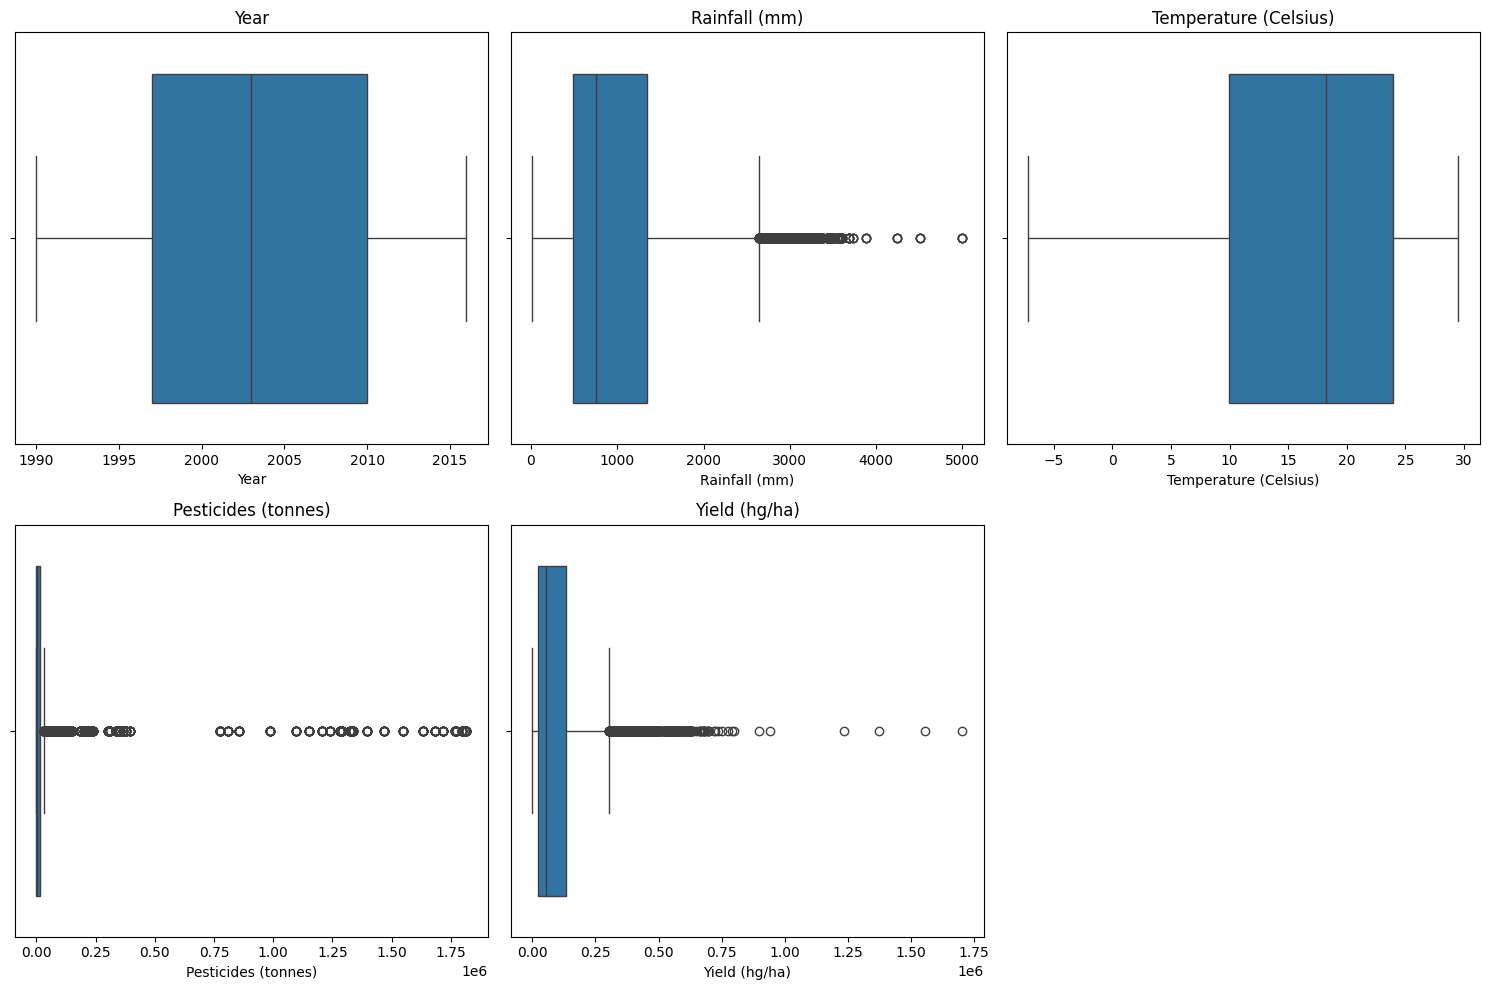

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

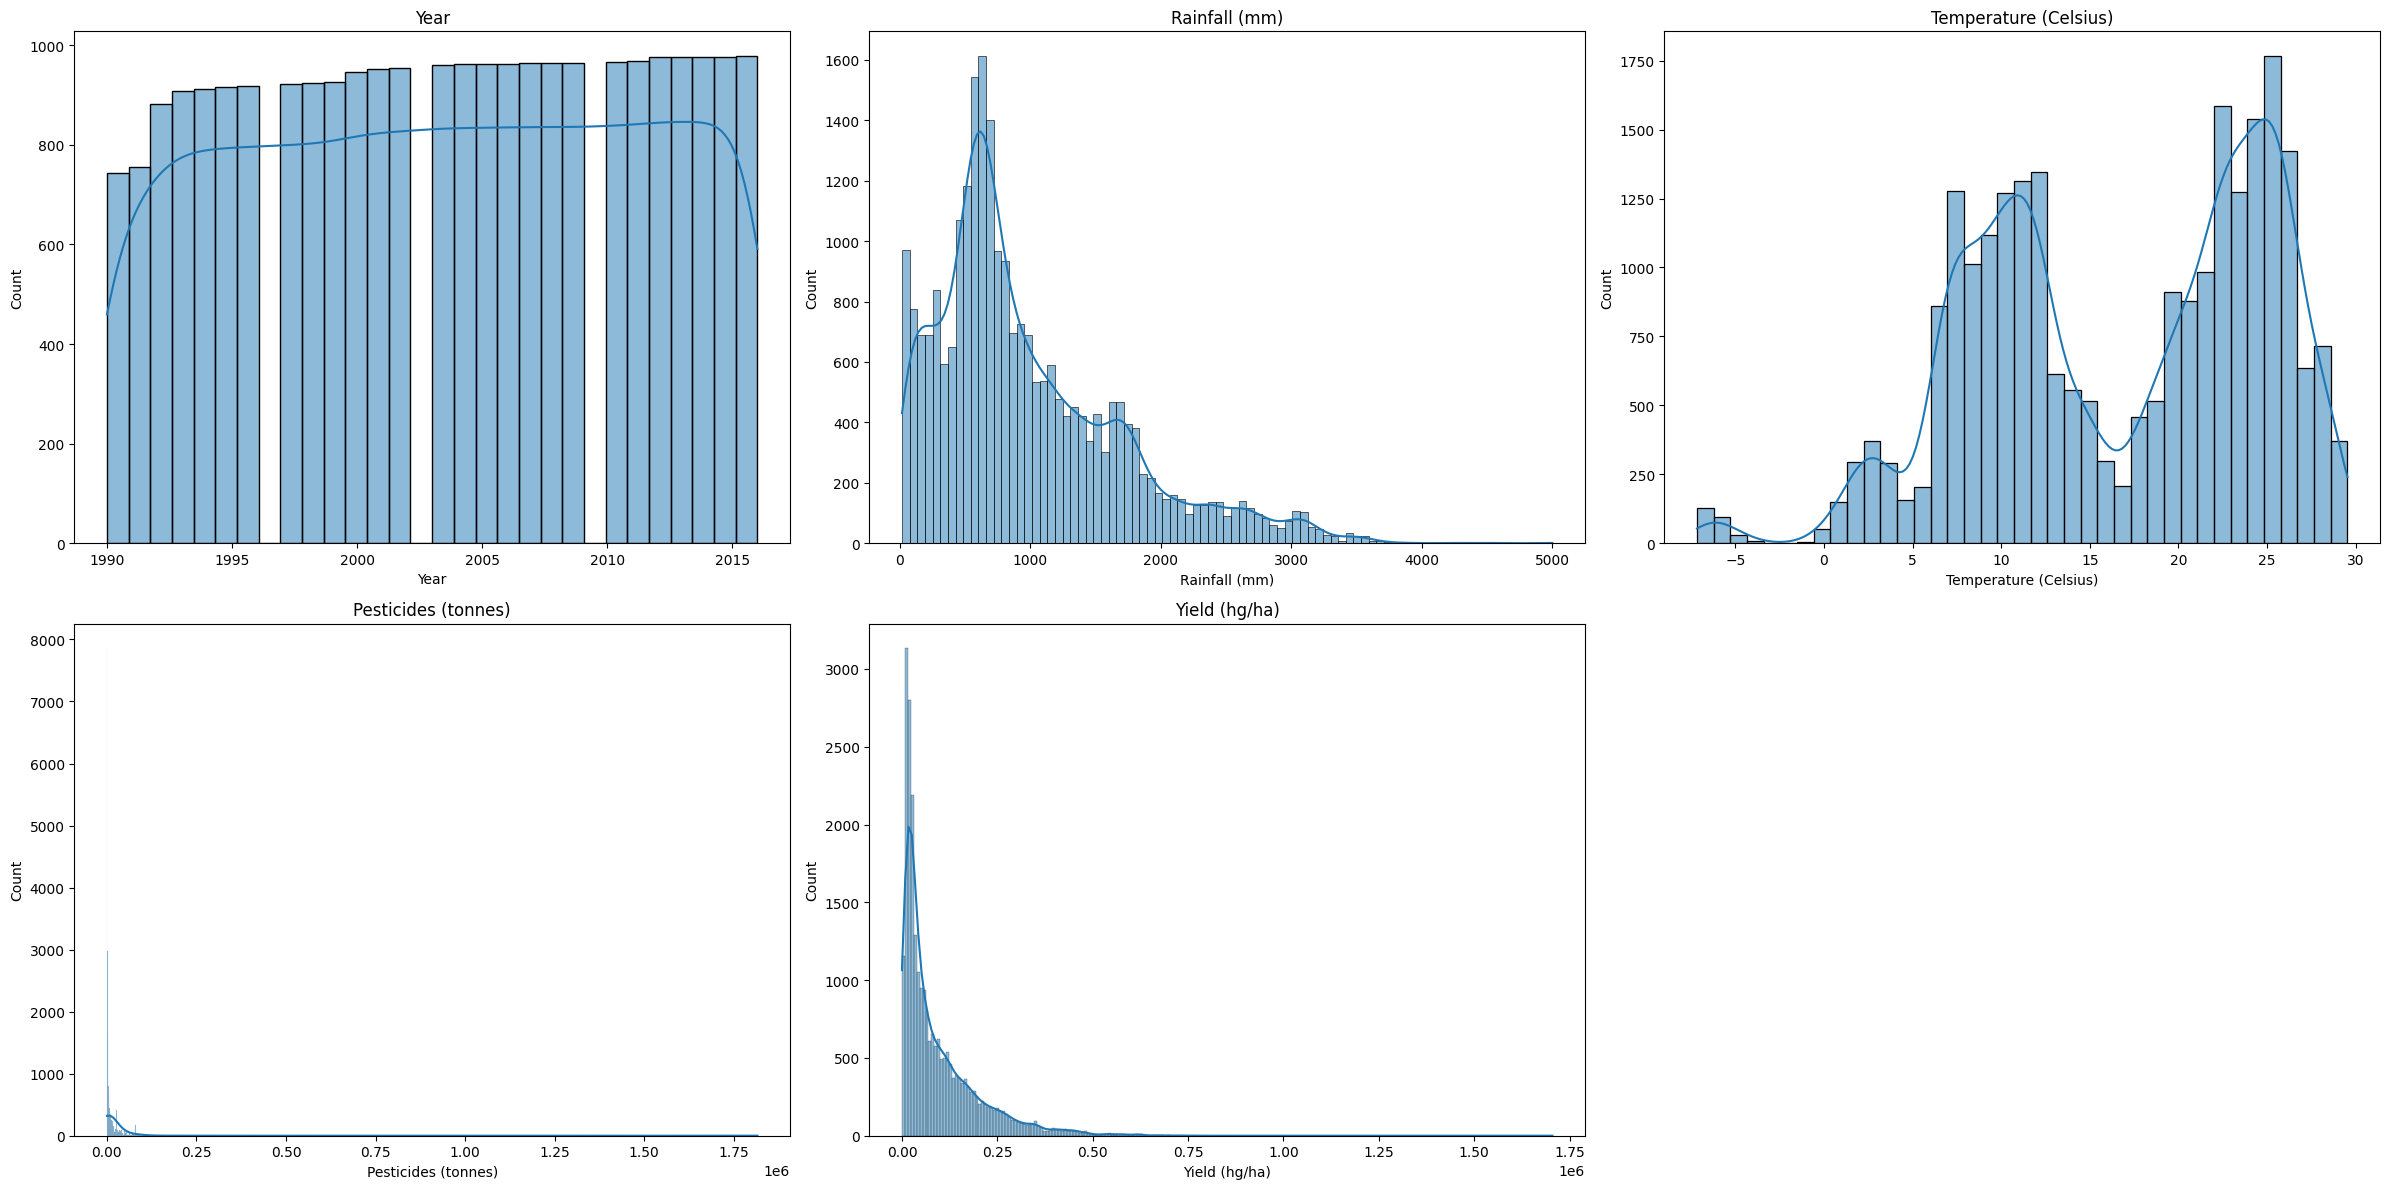

In [ ]:
num_cols_per_row = 3
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(num_cols_per_row * 8, num_rows * 6))

if isinstance(axes, np.ndarray):
    axes = axes.flatten()
elif num_rows == 1 and num_cols_per_row > 1:
    axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

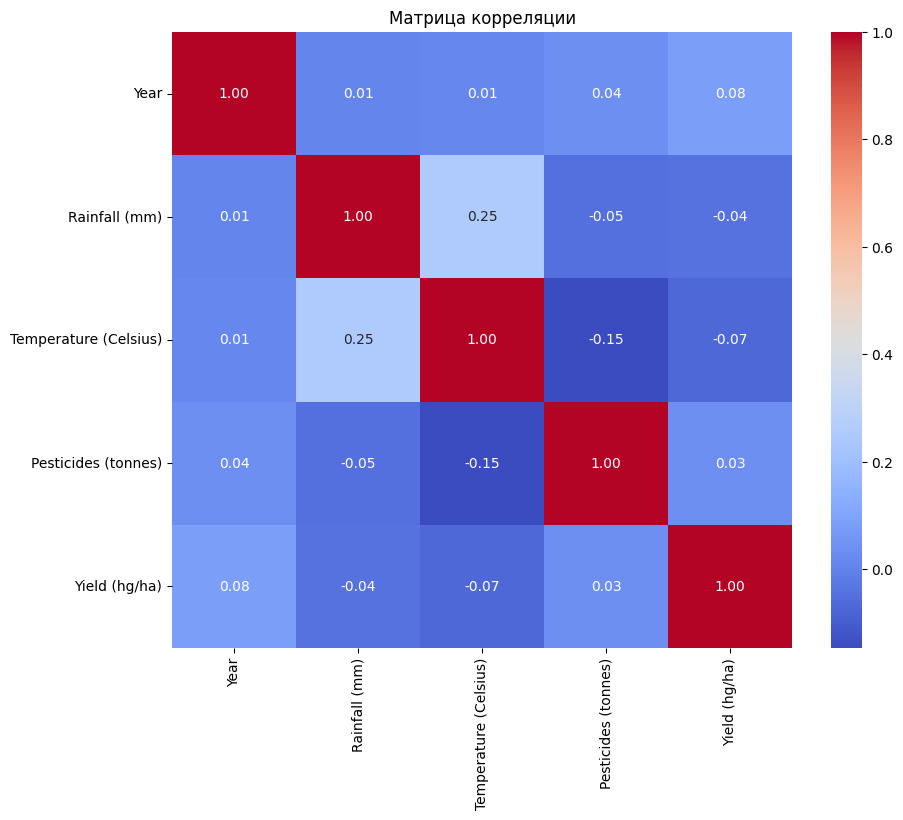

In [ ]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

In [ ]:
columns_to_process = ['Rainfall (mm)', 'Pesticides (tonnes)', 'Yield (hg/ha)']

for _ in range(2):
    for column in columns_to_process:
        data.loc[:, column] = data[column].replace(0, 1e-6)
        data.loc[:, column] = np.log1p(data[column])

<ipython-input-54-b78c224a6752>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 121.  121.  121. ... 2185. 2185. 2185.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, column] = data[column].replace(0, 1e-6)
<ipython-input-54-b78c224a6752>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 10000. 150000. 171429. ...  51792.  27283.  19013.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, column] = data[column].replace(0, 1e-6)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Yield (hg/ha)', axis=1)
y = data['Yield (hg/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Размер обучающей выборки X: {X_train.shape}')
print(f'Размер тестовой выборки X: {X_test.shape}')
print(f'Размер обучающей выборки y: {y_train.shape}')
print(f'Размер тестовой выборки y: {y_test.shape}')

Размер обучающей выборки X: (20183, 6)
Размер тестовой выборки X: (5046, 6)
Размер обучающей выборки y: (20183,)
Размер тестовой выборки y: (5046,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

linear_model = LinearRegression()

X = data.drop('Yield (hg/ha)', axis=1)
y = data['Yield (hg/ha)']

X_numerical = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Линейная регрессия:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")

Линейная регрессия:
  MSE: 0.01
  RMSE: 0.11
  MAE: 0.08


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)

X = data.drop('Yield (hg/ha)', axis=1)
y = data['Yield (hg/ha)']

X_numerical = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Случайный лес (регрессия):")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")

Случайный лес (регрессия):
  MSE: 0.01
  RMSE: 0.11
  MAE: 0.09


In [ ]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(random_state=42)

X = data.drop('Yield (hg/ha)', axis=1)
y = data['Yield (hg/ha)']

X_numerical = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Градиентный бустинг (XGBoost, регрессия):")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")

Градиентный бустинг (XGBoost, регрессия):
  MSE: 0.01
  RMSE: 0.10
  MAE: 0.08


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

X = data.drop('Yield (hg/ha)', axis=1)
y = data['Yield (hg/ha)']

X_numerical = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("KNN-регрессия:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")

KNN-регрессия:
  MSE: 0.01
  RMSE: 0.11
  MAE: 0.09
